## Random forest

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np

housing = pd.read_csv('data/housing.csv')

housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]


### Concepto total de variables

Árbol normal

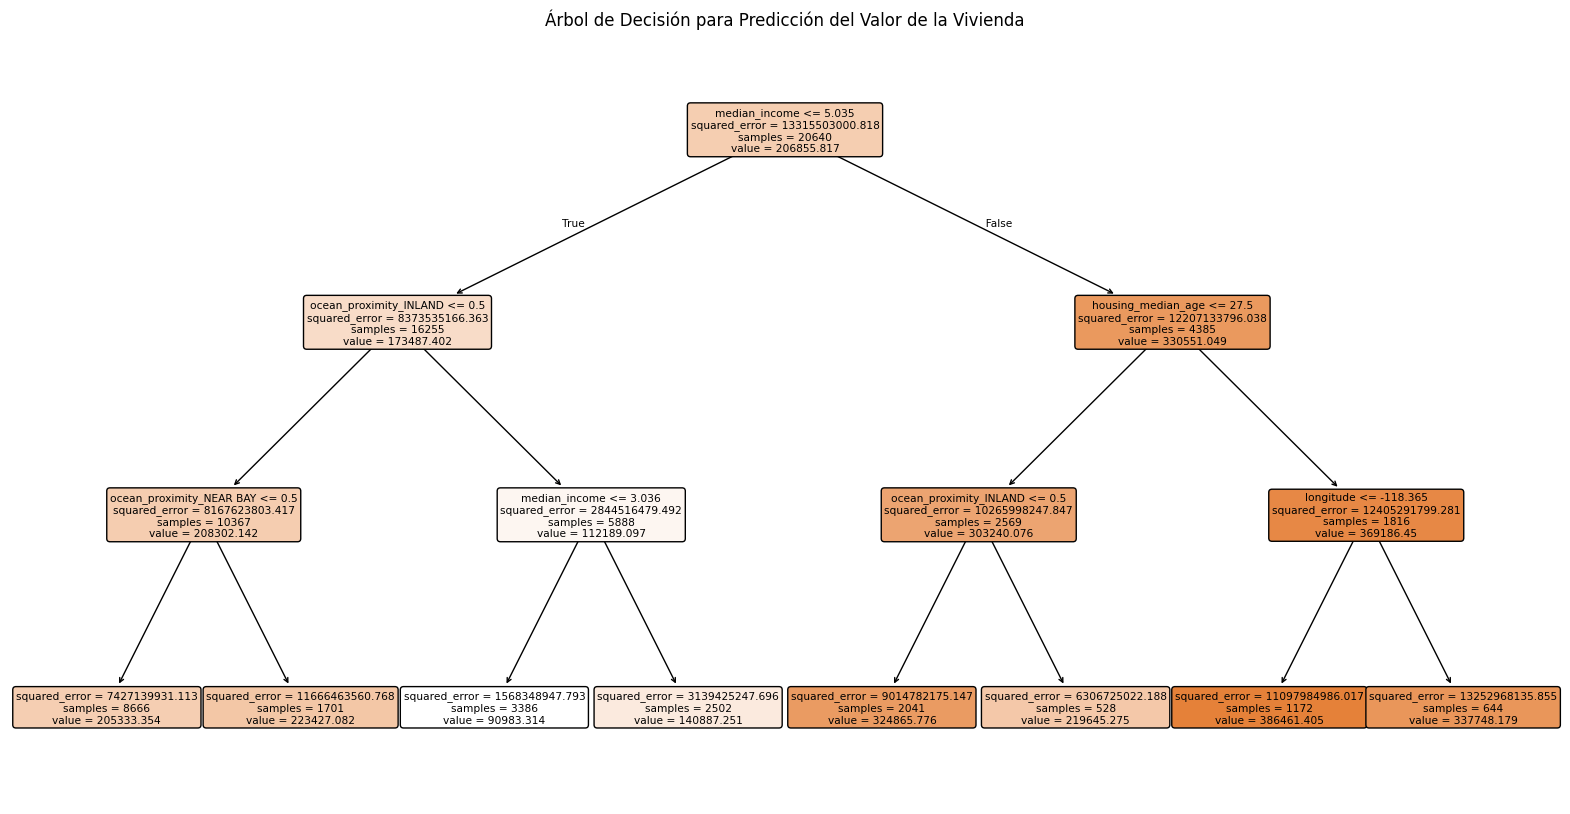

In [3]:
# Train model    
model = DecisionTreeRegressor(max_depth=3, random_state=42, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Maximo 3 features

In [1]:
# Crear y entrenar el modelo de árbol de decisión


### Maximo 2 features


In [5]:
# Crear y entrenar el modelo de árbol de decisión


In [6]:
# Random int


### Bootstrap tree

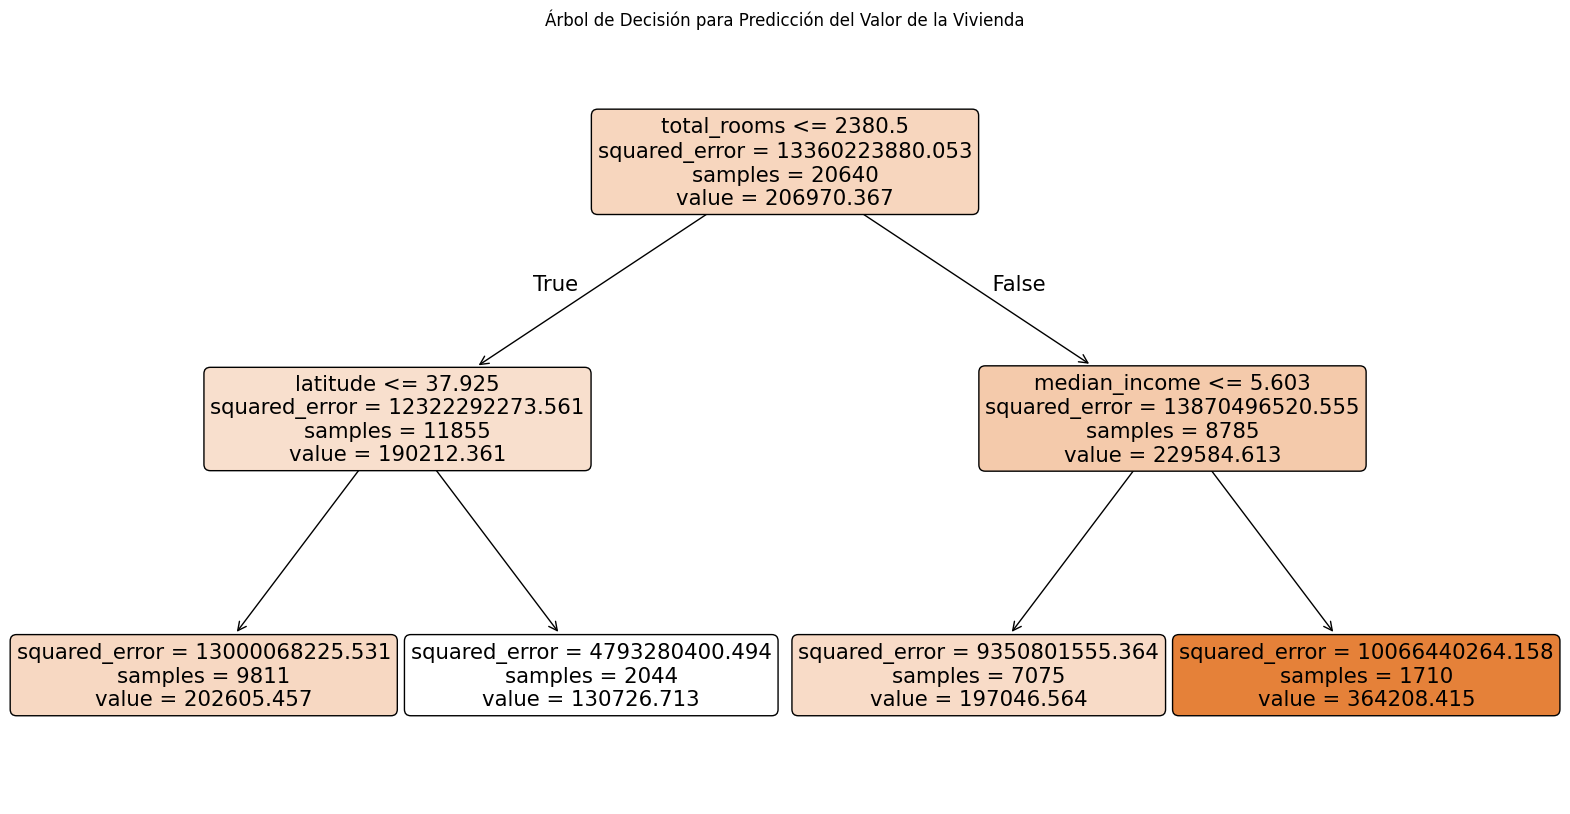

In [ ]:
# Crea un bootrap tree, cambia el random_state
bootstrap_housing = housing.sample(len(housing), replace=True)
X = bootstrap_housing.copy().drop(target, axis=1)
y = bootstrap_housing[target]

model = DecisionTreeRegressor(max_depth=2, random_state=1, max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Crea un bosque 

In [20]:
import random
random_states = np.linspace(1, 10, 100)

In [21]:
# X train y test
test_bootsrap = housing.sample(300)
X_sample = test_bootsrap.drop(target, axis=1)
y_sample = test_bootsrap[target]

df_predicciones = pd.DataFrame()

for i in range(300):
    bootstrap_housing = housing.sample(len(housing), replace=True)
    X = bootstrap_housing.copy().drop(target, axis=1)
    y = bootstrap_housing[target]

    model = DecisionTreeRegressor(max_depth=8, random_state=i, max_features=len(X.keys()))
    model.fit(X, y)

    prediccion = model.predict(X_sample)
    df_predicciones[f'prediccion_{i}'] = prediccion


In [22]:
predicciones_rf = df_predicciones.mean(axis=1)

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
from sklearn.metrics import r2_score
r2_score(y_pred=predicciones_rf, y_true=y_sample)

0.8360936663720022

### Usando Sklearn

In [25]:
from sklearn.ensemble import RandomForestRegressor

housing = pd.read_csv('data/housing.csv')
housing = housing.fillna(-1)
housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [31]:
# Grid search
pipeline = Pipeline([
    ('rf', RandomForestRegressor(n_estimators=100, n_jobs=-1))
])

params = {
    'rf__max_depth': [8, 10, 15],
    'rf__max_features': ['log2', 'sqrt', 10, 12]
}

rf_grid = GridSearchCV(estimator=pipeline, n_jobs=-1, cv=5, scoring='r2', param_grid=params)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [8, 10, 15],
                         'rf__max_features': ['log2', 'sqrt', 10, 12]},
             scoring='r2')

In [33]:
rf_grid.best_params_

{'rf__max_depth': 15, 'rf__max_features': 10}

In [32]:
best_model = rf_grid.best_estimator_.named_steps['rf']

In [30]:
# Comparar con regresion lineal 
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
predicciones = model.predict(X_test)
r2_score(y_pred=predicciones, y_true=y_test)

0.6146061359095134

# Interpretacion del modelo

In [34]:
model_interpretability = pd.DataFrame({
    'variables': X.keys(),
    'importancia': best_model.feature_importances_
})
model_interpretability

,variables,importancia
0,longitude,0.105370
1,latitude,0.098334
2,housing_median_age,0.048486
3,total_rooms,0.021385
4,total_bedrooms,0.022121
5,population,0.029855
6,households,0.016998
7,median_income,0.488615
8,ocean_proximity_INLAND,0.158370
9,ocean_proximity_ISLAND,0.000323


## Partial dependence plot


Un Partial Dependence Plot (PDP) muestra la relación entre una o más características y la predicción de un modelo, manteniendo las demás variables fijas. Es útil para entender cómo un modelo como un Random Forest toma decisiones.

fig, ax = plt.subplots(figsize=(8, 5))

PartialDependenceDisplay.from_estimator(best_forest, X_train, [7], ax=ax, feature_names=X_train.keys())


In [35]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay


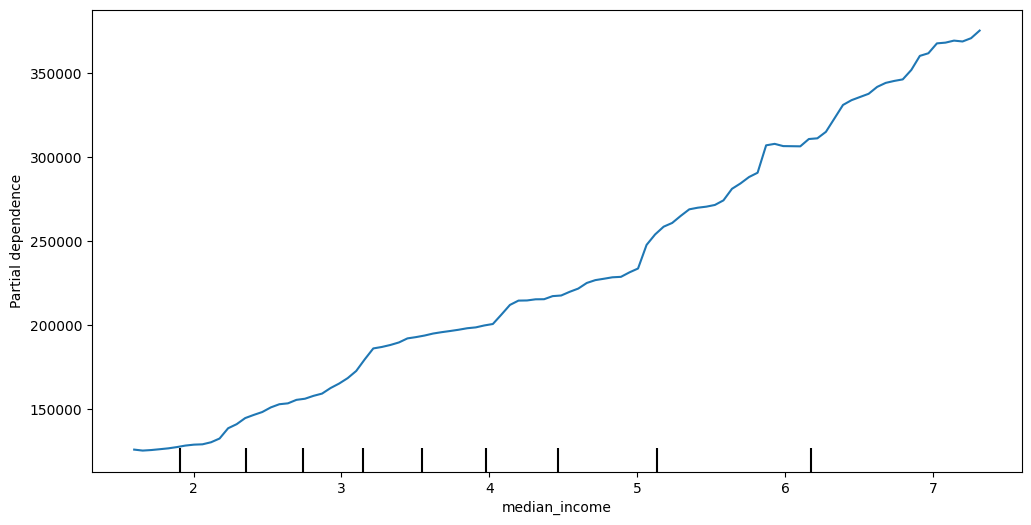

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_model, X_train, [7], ax=ax, feature_names=X.keys())

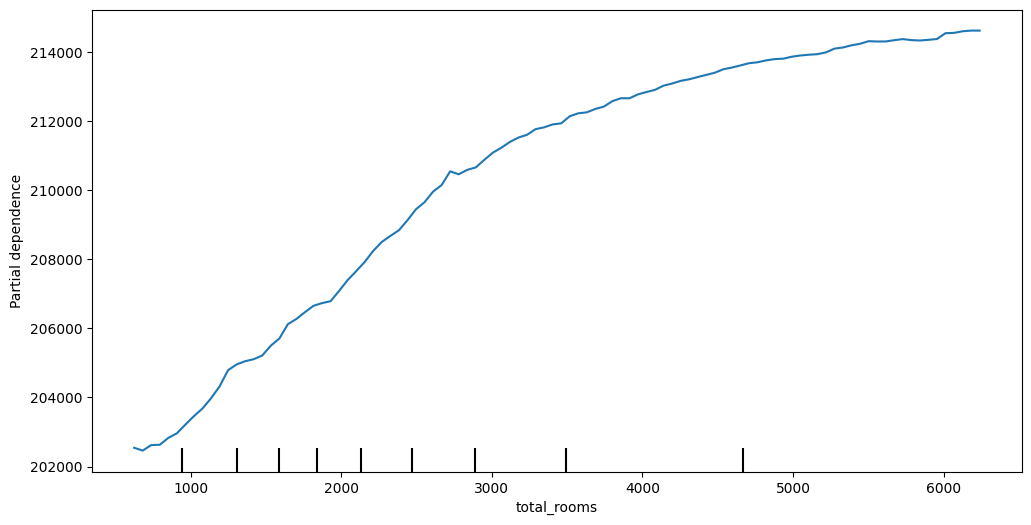

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_model, X_train, [3], ax=ax, feature_names=X.keys())

### Partial dependence 3D
PartialDependenceDisplay.from_estimator(best_forest, X_train, [(0, 1)], ax=ax, feature_names=X_train.keys())

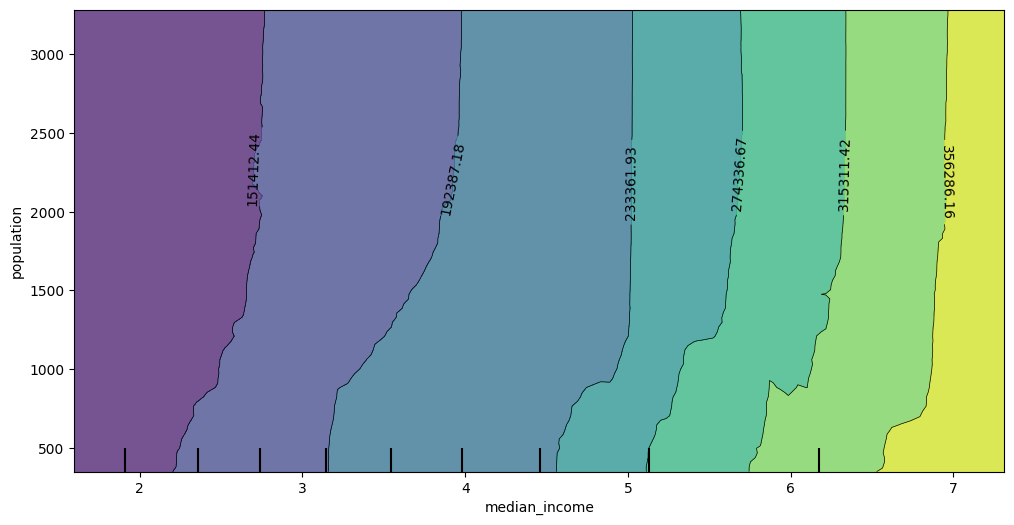

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_model, X_train, [(7, 5)], ax=ax, feature_names=X_train.keys())